### Q12 Agenda (Week 13/14 (Neural Networks))

#### a) Neural networks prediction (regression vs classification)

`03-activation_loss`

$$ReLU(x) = max(0,x)\\
sigmoid(x) = \frac{1}{1+e^{-x}}$$

##### Simple regression NN regression

Example: input height in cm, output shoe size

```mermaid
flowchart LR
    AcircleId(("Input")) -- *w_1 --> BcircleId(("ReLU"))
    Kid1["+b_2"] -.-> CcircleId(("ReLU"))
    AcircleId -- *w_2 --> CcircleId
    CcircleId -- *w_4 --> DcircleId(("Linear"))
    Eid1["+b_3"] -.-> DcircleId
    BcircleId -- *w_3 --> DcircleId
    Pid1["+b_1"] -.-> BcircleId

    Kid1@{ shape: text}
    Eid1@{ shape: text}
    Pid1@{ shape: text}
    style Kid1 stroke-width:1px,stroke-dasharray: 0
    style Eid1 stroke-width:1px,stroke-dasharray: 0,fill:transparent
    style Pid1 stroke-width:1px,stroke-dasharray: 0
```

$$NNReg(x) = ReLU(x*w_1+b_1)*w_3+ ReLU(x*w_2+b_2)*w_4+b_3$$


##### Simple regression NN classification

Example: input height in cm, probability of being older than 5 years

```mermaid
flowchart LR
    AcircleId(("Input")) -- *w_1 --> BcircleId(("ReLU"))
    Kid1["+b_2"] -.-> CcircleId(("ReLU"))
    AcircleId -- *w_2 --> CcircleId
    CcircleId -- *w_4 --> DcircleId(("Sigmoid"))
    Eid1["+b_3"] -.-> DcircleId
    BcircleId -- *w_3 --> DcircleId
    Pid1["+b_1"] -.-> BcircleId

    Kid1@{ shape: text}
    Eid1@{ shape: text}
    Pid1@{ shape: text}
    style Kid1 stroke-width:1px,stroke-dasharray: 0
    style Eid1 stroke-width:1px,stroke-dasharray: 0,fill:transparent
    style Pid1 stroke-width:1px,stroke-dasharray: 0
```

$$NNClas(x) = sigmoid(ReLU(x*w_1+b_1)*w_3+ ReLU(x*w_2+b_2)*w_4+b_3)$$

Example input:
$$x=150, w_1=-2, b_1=50, w_3=4, b_3=8, w_2=3, b_2=-200, w_4=0.1$$

Example output:
$$NNReg(150)=33\\
NNClas(150)=1$$

*Meaning*: 
- if you are 150 cm then the NNReg predicts your shoe size is 33
- if you are 150 cm then the NNClas predicts that the probabily if you being more than 5 years old is 1 aka 100%

*Other notes*:
- Difference between regression and classification 
    - Output layer
        - Regression: single output node with no activation function
        - Classification: 
            - Binary classification: 1 output node with sigmoid activation function
            - Multiclass: as many neurons as classes with softmax activation function
    - Loss function
        - Regression: MSE
        - Classification:
            - Binary classification: Binary Cross-Entropy (BCE)
            - Multiclass: Categorical Cross-Entropy
    - Predictions
        - Regression: Numerical values
        - Classification: dicrete labels or categories
- Exercise explores different activation functions for classification and regression.
    - Task 2 & 3 (activation functions)
        - see plot of how different activation functions perform
        - All but linear does well after 1000 epochs
        - Sigmoid and ELU takes longer to do well
    - Task 4 & 5 (loss functions)
        - BCE punishes (has high loss) for predictions that are far off
            - good for classification
            - predictions for 0.9 and 0.1
    - Task 6 & 7 (loss functions)
        -  BCE has better accuracy and F1 score
            - BCE is generally better for classification since it is designed for classification tasks.

#### b) Neural networks training (Gradients, the chain rule, and back/forward propagation)

`07-nn-gaze`

- NN trained (finding best model parameters) using backpropagation, but first: chain rule and gradient descent

##### Gradient descent

- Iterative optimization algorithm used to minimize a functions loss
- Typically used to find the model parameters if least squares is not used
- Steps:
    - randomly initializing the model parameters and setting the learning rate and the number of iterations. 
    - computes the loss using the loss function
    - Calculate the gradients of the loss functions with respect to the model parameters
        - The gradients indicate the direction the model parameters should change.
        - Example Neural network:

        ```mermaid
        flowchart LR
            AcircleId(("Input")) -- *w_1 --> BcircleId(("Linear"))
            Kid1["+b_2"] -.-> CcircleId(("Linear"))
            AcircleId -- *w_2 --> CcircleId
            CcircleId -- *w_4 --> DcircleId(("Linear"))
            Eid1["+b_3"] -.-> DcircleId
            BcircleId -- *w_3 --> DcircleId
            Pid1["+b_1"] -.-> BcircleId

            Kid1@{ shape: text}
            Eid1@{ shape: text}
            Pid1@{ shape: text}
            style Kid1 stroke-width:1px,stroke-dasharray: 0
            style Eid1 stroke-width:1px,stroke-dasharray: 0,fill:transparent
            style Pid1 stroke-width:1px,stroke-dasharray: 0
        ```

        $$NN(x) = (x*w_1+b_1)*w_3+ (x*w_2+b_2)*w_4+b_3$$

        Loss function: Sum of squared residuals (SSR) aka MSE without mean

        $$SSR(y,y')=\sum_{i=1}^{n}(y-y')^2$$
        - where y is the observed value and y' is the predicted value by the model

        The chain rule   
            $$f(g(x))'=f'(g(x))·g'(x)$$

        The product rule:
            $$h(x)=f(x)*g(x)\\ h'(x)=f'(x)*g(x)+f(x)*g'(x)$$

        *Gradient of loss function with respect to* $w_1$
        - using the chain rule:
            $$\frac{\partial SSR}{\partial w_1}=\frac{\partial SSR}{\partial y'}*\frac{\partial y'}{\partial w_1}$$ 

        - calculating first part using the chain rule:
            $$\frac{\partial SSR}{\partial y'}=\sum_{i=1}^{n}2(y-y')*(-1)=\sum_{i=1}^{n}-2(y-y')$$ 
        - calculating the second part using the product rule:
            $$\frac{\partial y'}{\partial w_1}=\frac{\partial}{\partial w_1}(x*w_1+b_1)*w_3+ (x*w_2+b_2)*w_4+b_3=\frac{\partial}{\partial w_1}(x*w_1+b_1)*w_3 = x w_3$$ 
        - plug it in to find the gradient of the loss function with respect to $w_1$:
            $$\frac{\partial SSR}{\partial w_1}=\frac{\partial SSR}{\partial y'}*\frac{\partial y'}{\partial w_1}=\sum_{i=1}^{n}-2(y-y')*x w_3$$ 
        - Example done

    - Model parameters are updated:
        $$\theta_i \gets \theta_i - \eta \cdot \frac{\partial L}{\partial \theta_i}$$
        - where η is the learning rate that determines how large the update step is. 
        - Subtracting the gradient ensures the parameters move toward the minimum of the loss function.
    - Compute loss and iterate until 
        - Gradient close to 0
        - max number of training rounds reached
- Task 7 `w14/01-optimization`
    - Gradient descent does not guarantee reaching a global minimum
    - Big steps when it is far from a minimum and small steps when it is close to a minimum
    - Depending on the initial values and the learning rate, we might not find the minimum

##### Backpropagation

- adjusts the weights of the network to minimize the error in predictions by using gradient descent
- Steps:
    - randomly initialize the model parameters
    - forward pass - calculate the final output of the neural network and the loss
    - backward pass - compute the gradients using the chain rule and use gradient descent to update the model parameters
    - iterate until the loss is minimized or the max number of iterations (epochs) has been reached

##### Task 10 `07-nn-gaze`

- See how learning rate and epochs affect the MSE
- Finding sweet spot for learning rate and epochs


#### c) Training and Evaluation including over/underfitting


##### Gradient descent

- Iterative optimization algorithm used to minimize a functions loss
- Typically used to find the model parameters if least squares is not used
- Steps:
    - randomly initializing the model parameters and setting the learning rate and the number of iterations. 
    - computes the loss using the loss function
    - Calculate the gradients of the loss functions with respect to the model parameters
        - The gradients indicate the direction the model parameters should change.
        - Example Neural network:

        ```mermaid
        flowchart LR
            AcircleId(("Input")) -- *w_1 --> BcircleId(("Linear"))
            Kid1["+b_2"] -.-> CcircleId(("Linear"))
            AcircleId -- *w_2 --> CcircleId
            CcircleId -- *w_4 --> DcircleId(("Linear"))
            Eid1["+b_3"] -.-> DcircleId
            BcircleId -- *w_3 --> DcircleId
            Pid1["+b_1"] -.-> BcircleId

            Kid1@{ shape: text}
            Eid1@{ shape: text}
            Pid1@{ shape: text}
            style Kid1 stroke-width:1px,stroke-dasharray: 0
            style Eid1 stroke-width:1px,stroke-dasharray: 0,fill:transparent
            style Pid1 stroke-width:1px,stroke-dasharray: 0
        ```

        $$NN(x) = (x*w_1+b_1)*w_3+ (x*w_2+b_2)*w_4+b_3$$

        Loss function: Sum of squared residuals (SSR) aka MSE without mean

        $$SSR(y,y')=\sum_{i=1}^{n}(y-y')^2$$
        - where y is the observed value and y' is the predicted value by the model

        The chain rule   
            $$(f(g(x))'=f'(g(x))·g'(x)$$

        The product rule:
            $$h(x)=f(x)*g(x)\\ h'(x)=f'(x)*g(x)+f(x)*g'(x)$$

        *Gradient of loss function with respect to* $w_1$
        - using the chain rule:
            $$\frac{\partial SSR}{\partial w_1}=\frac{\partial SSR}{\partial y'}*\frac{\partial y'}{\partial w_1}$$ 

        - calculating first part using the chain rule:
            $$\frac{\partial SSR}{\partial y'}=\sum_{i=1}^{n}2(y-y')*(-1)=\sum_{i=1}^{n}-2(y-y')$$ 
        - calculating the second part using the product rule:
            $$\frac{\partial y'}{\partial w_1}=\frac{\partial}{\partial w_1}(x*w_1+b_1)*w_3+ (x*w_2+b_2)*w_4+b_3=\frac{\partial}{\partial w_1}(x*w_1+b_1)*w_3 = x w_3$$ 
        - plug it in to find the gradient of the loss function with respect to $w_1$:
            $$\frac{\partial SSR}{\partial w_1}=\frac{\partial SSR}{\partial y'}*\frac{\partial y'}{\partial w_1}=\sum_{i=1}^{n}-2(y-y')*x w_3$$ 
        - Example done

    - Model parameters are updated:
        $$\theta_i \gets \theta_i - \eta \cdot \frac{\partial L}{\partial \theta_i}$$
        - where η is the learning rate that determines how large the update step is. 
        - Subtracting the gradient ensures the parameters move toward the minimum of the loss function.
    - Compute loss and iterate until 
        - Gradient close to 0
        - max number of training rounds reached
- Task 7 `w14/01-optimization`
    - Gradient descent does not guarantee reaching a global minimum
    - Big steps when it is far from a minimum and small steps when it is close to a minimum
    - Depending on the initial values and the learning rate, we might not find the minimum

##### Backpropagation

- adjusts the weights of the network to minimize the error in predictions by using gradient descent
- Steps:
    - randomly initialize the model parameters
    - forward pass - calculate the final output of the neural network and the loss
    - backward pass - compute the gradients using the chain rule and use gradient descent to update the model parameters
    - iterate until the loss is minimized or the max number of iterations (epochs) has been reached

##### Task 10 `07-nn-gaze`

- See how learning rate and epochs affect the MSE
- Finding sweet spot for learning rate and epochs

##### Task 13

- cleaned dataset with outliers removed
- Better results since:
    - model might not learn trend because of outliers
    - MSE squares so outliers influence heavily


#### d) Model architectures: Difference between fully connected / multi-layer perceptron (MLP) and CNN


##### Difference between MLP and CNN 

##### Input data

- MLP: vectorized (e.g., tabular data or a flattened image)
- CNN: structured data like images which have spatial relationsships

##### Layers

- MLP: 
    - connected to every neuron in adjacent layers
    - Global patterns
- CNN
    - Local patterns
    - consisits of convolutional layers, pooling layers, and fully connected layers
        - Convolutional Layers extract localized features using filters/kernels.
            - Detect horizontal, vertical, or diagonal edges.
            - Example filter:
            Detects horizontal edges.
            
            $$
            \begin{bmatrix}
            -1 & -1 & -1 \\
            0 & 0 & 0 \\
            1 & 1 & 1
            \end{bmatrix}
            $$
        - Pooling Layers reduce spatial dimensions while retaining important information.
            - Image of bird 3000*3000 px -> Image of bird 500*500 px

##### Model parameters

- MLP: More parameters
    - prone to overfitting
- CNN: Less parameters

##### Conclusion:

- MLP: Good for structed data such as spreadsheets or numeric datasets
- CNN is good for image and spatial data due to its ability to capture local and hierarchical patterns.

#### e) Loss function, regularization, data augmentation, model complexity, cross-validation

`03-bias_variance`

##### Overfitting vs underfitting 

- Overfitting
    - Model learns the noise and specific details of the training data
    - poor generalization to unseen data
    - sign of overfitting is that the loss is low for training but high when testing
- Underfitting
    - Model too simple to capture trend
    - Sign: poor performance on both test and training

##### Methods to avoid overfitting

- Regularization (Task 2)
    - Regularization balances model complexity and performance
    - encourages simpler models, meaning models will smaller model parameters
    - Task 2!!
    - Can be used in combination with cross validation to find lambda
- Cross validation
    - evaluating a model's ability to generalize to unseen data
    - Can be used to avoid overfitting
    - Splitting data into subsets of training and testing data
- Data augmentation
    - technique used to artificially increase the size and diversity of the training dataset
    - If dataset is small and not diverse it might overfit the data
    - helps improve model generalization and reduces the risk of overfitting.

#### f) Regularization, cross-validation and bias-variance

`w14/03-bias_variance`

##### Bias/variance

- Bias
    - occurs when the model is too simple to capture the underlying patterns in the data (underfitting)
    - high bias makes strong assumptions about the data, leading to systematic errors in predictions
    - Example of high bias - linear model for data that has a nonlinear relationship.
- Variance
    - refers to the model's sensitivity to small changes in the training data
    - High variance means the model fits the training data too closely, capturing noise rather than general patterns (overfitting)
- Bias variance tradeoff
    - finding the balance between the two
    - good model has low bias an low variance, performing well on both training and test data.

##### Methods to find this balance between bias and variance

- Regularization (Task 2)
    - Regularization balances model complexity and performance
    - encourages simpler models, meaning models will smaller model parameters
    - Task 2!!
    - Can be used in combination with cross validation to find lambda
- Cross validation
    - Splitting data into subsets of training and testing data
    - evaluating a model's ability to generalize to unseen data
    - Can be used to avoid overfitting
        

# Activation functions and loss functions
This exercise is about activation- and loss functions for neural architectures. The architecture of an NN offers endless variations and customization possibilities for defining (families of) prediction functions, making it impractical to exhaustively test every possible option for a given problem. Consequently, developing an intuition of how different architectural choices, parameters, and hyperparameters impact the performance of the network is essential. 

**Important**
Most of the code is provided, with only a few adjustments left to complete, it is however important for you to reflect on the outcomes and **relate them to the theory**.


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#activation">Task 1: Implement activation functions</a>
            </li>
            <li>
            <a href="#activation1">Task 2: Experiment with activation functions</a>
            </li>
            <li>
            <a href="#activation2">Task 3: Evaluate</a>
            </li>
            <li>
            <a href="#loss">Task 4: Implement loss functions</a>
            </li>
            <li>
            <a href="#loss1">Task 5: Visualizing loss functions</a>
            </li>
            <li>
            <a href="#loss2">Task 6: Experiment with loss functions</a>
            </li>
            <li>
            <a href="#loss3">Task 7: Evaluate</a>
            </li>
            <li>
            <a href="#loss4">Task 8: Custom loss functions</a>
            </li>
        </ul>
    </div>
</article>

## Activation Functions
This exercise is about the importance of selecting an appropriate activation function. Activation functions are crucial for introducing non-linearity into neural architectures. Each activation function has its unique characteristics and trade-offs and can significantly influence the model’s predictive capability, impacting its performance, convergence behavior, and the complexity of tasks it can effectively address.
This exercise explores activation functions for:
**Classification:**
- Sigmoid: Commonly used in binary classification tasks, the sigmoid function maps input values to a number between 0 and 1. However, it can suffer from so-called vanishing gradient problems, occurring in deeper networks.

- Hyperbolic Tangent (tanh): maps inputs to the range between -1 and 1 and addresses some of the shortcomings of the sigmoid function in terms of vanishing gradients.

- Softmax: is a generalization of the logistic function, commonly used for the output layer of multi-class classification networks, converting raw inputs into probabilities across multiple classes.


**Regression:**
- Rectified Linear Unit (ReLU): ReLU introduces non-linearity while maintaining computational efficiency. It helps mitigate vanishing gradient issues but may encounter "dead neurons" due to zero gradients for negative inputs.

- Leaky ReLU: addresses the "dying ReLU" problem by allowing a small, non-zero gradients for negative inputs, maintaining active neurons during training.

- Exponential Linear Unit (ELU): similar to ReLU for positive inputs, ELU applies an exponential function to negative values, ensuring smoother gradients and reducing the risk of “dead neurons” during trainin



---
**Task 1 (medium): Implement activation functions👩‍💻**
1. Use the `torch`
 library to implement the activation functions defined in the cell below. 


**Activation functions**
**Linear**

$$
f(x) = x
$$
**Sigmoid**

$$
f(x) = \frac{1}{1 + e^{-x}}
$$
**ReLU**

$$
f(x) = \max(0, x)
$$
**Leaky ReLU**

$$
f(x) = \begin{cases} 
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0 
\end{cases}
$$
**Tanh**

$$
f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$
**ELU**

$$
f(x) = \begin{cases} 
x & \text{for } x \geq 0 \\
\alpha \left( e^x - 1 \right) & \text{for } x < 0
\end{cases}
$$



---

In [0]:
import torch


def linear(x):
    return None # Replace

def sigmoid(x):
    return None # Replace

def relu(x):
    return None # Replace

def leaky_relu(x, alpha=0.01):
    return None # Replace

def tanh(x):
    return None # Replace

def elu(x, alpha=1.0):
    return None # Replace

## Applying activation functions to neural networks
<div style="float: right; width: 50%; justify-content: start" class="block is-clearfix">

<div class="has-text-centered">
<figure class="image is-inline-block" id="make_moons">

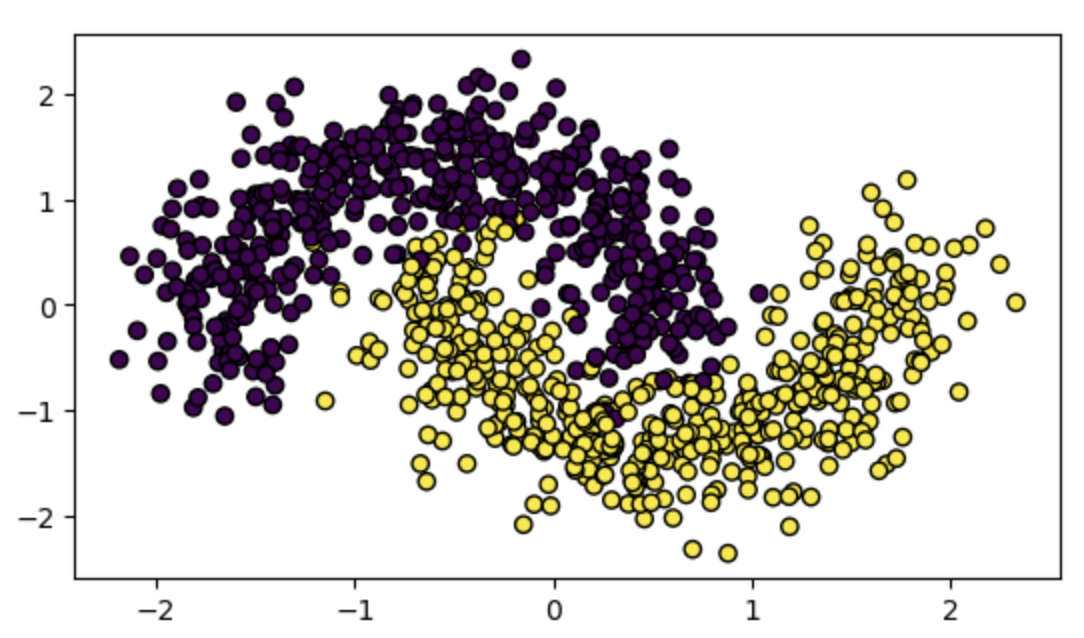

<figcaption class="figure-caption has-text-center">Figure 1: Example of the synthetic data generated by the `make_moons`
 function.
</figcaption>
</figure>
</div>


</div>

The `make_moons`
 function from the [Scikit-Learn Library](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)
 is used to generate synthetic data. The function generates two classes to be separated as shown in [Figure 1](#make_moons). The following tasks will apply the activation functions for the classification problem to:
- train neural networks (NNs), 
- evaluate their effects on performance, focusing on accuracy, convergence speed, and computational efficiency.

The NN defined in the cell below uses functions and classes defined in the following files:
- `networks.py`
: Contains the `SimpleNN`
 network implementation.
- `trainers.py`
: contains the `train`
 function used for training.
- `metrics.py`
: contains the `evaluateNN`
 function for evaluation and visualization.


---
**Task 2 (medium): Experiment with activation functions👩‍💻**
1. Examine the files and gain an overview of the architecture of the NN and the training loop. 

2. Run the cell below to train and visualize the performance of the models with the different activations functions.



---

In [0]:
from torch import optim
from torchvision import transforms
from trainers import *
from networks import *
from metrics import *

X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor,X_train, X_test, y_train, y_test, X, y  = get_data()
# Activation functions to test
activation_functions = {
    'linear': linear,
    'sigmoid': sigmoid,
    'relu': relu,
    'tanh': tanh,
    'leaky_relu': leaky_relu,
    'elu': elu
}

results = {}

for name, activation in activation_functions.items():
    model, train_losses, accuracy, training_time, decision_threshold = train(SimpleNN(activation=activation), name, X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor, X_train, X_test, y_train, y_test, epoch=300 )
    # Store results
    results[name] = {
        'model': model,
        'train_losses': train_losses,
        'accuracy': accuracy,
        'training_time': training_time
    }

evaluateNN(results, X, y)


---
**Task 3 (medium): Evaluate👩‍💻💡**
1. Evaluate the performance of the models based on the activation functions used. Analyze the results using the plots and relate them to theoretical concepts to interpret the outcomes.
2. Evaluate the activation functions in terms of computational efficiency and their suitability for the given problem. Explain which activation function is preferred and justify the choice.
3. Rerun the experiment by increasing the number of epochs to 1000. Investigate the training curves and analyze the results. Discuss why some activation functions cause the learning  to plateau before eventually converging to a smaller loss?


---

In [0]:
#Write your reflactions here...

## Loss Functions
The loss function evaluates how closely the model’s predictions match the true labels and guides the adjustment of model parameters during training. Different types of problems require specific loss functions. Therefore, understanding the data and the problem is crucial for selecting or designing the most suitable loss function for training the network.
This exercise explores the impact of the following loss functions:
**Classification**
- Binary Cross Entropy (BCE)

**Regression**
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)


---
**Task 4 (medium): Implement loss functions👩‍💻**
1. Implement the loss functions defined below using the `torch`
 library.


**Loss functions**
Let:
- $ y_i $ be the true value of the $i$-th sample in the training set, 
- $ N $ be the number of samples.

Define:
**Mean Squared Error (MSE)**

$$
\text{MSE}(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$
where $ \hat{y}_i $ is the predicted value of the $i$-th sample in the training set.
**Mean Absolute Error**

$$
\text{MAE}(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i|
$$
where $ \hat{y}_i $ is the predicted value of the $i$-th sample in the training set.. 
**Binary Cross-Entropy Loss (BCE)**

$$
\text{BCE}(y, \hat{y}) = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$
where $ \hat{y}_i $ is the predicted probability of the $i$-th sample in the training set.


---

In [0]:
# Custom Binary Cross-Entropy Loss Function
class BCE_Loss(nn.Module):
    def __init__(self):
        super(BCE_Loss, self).__init__()

    def forward(self, outputs, targets):
        epsilon = 1e-12
        outputs = torch.clamp(outputs, min=epsilon, max=1-epsilon)
        return None #Write your solution here

            

# Custom Mean Squared Error Loss Function
class MSE_Loss(nn.Module):
    def __init__(self):
        super(MSE_Loss, self).__init__()

    def forward(self, outputs, targets):
        return None #Write your solution here


# Custom Mean Absolute Error Loss Function
class MAE_Loss(nn.Module):
    def __init__(self):
        super(MAE_Loss, self).__init__()

    def forward(self, outputs, targets):
        return None #Write your solution here


---
**Task 5 (medium): Visualizing loss functions👩‍💻**
1. Complete the cell below to visualize the  `BCE`
, `MSE`
 and `MAE`
 loss functions when applied to a synthetic binary classification problem. Use the implemented loss functions, the true labels and the `linspace`
 in a for loop, to plot the loss functions.
2. Use the plots and the definitions of the loss functions to argue why `BCE`
 is preferred for classification problems. 


---

In [0]:
import seaborn as sns

# Instantiate the loss functions
#Write your solution here...

# True label
y_true = torch.tensor([0.0, 1.0])  # True label 

# Range of predictions
predictions = torch.tensor(np.linspace(0.01, 0.99, 100))

# Plot using Seaborn
plt.figure(figsize=(8, 4))

for i in y_true:
    # Compute BCE and MSE using the defined classes

    #bce_values = ...
    #mse_values = ...
    #mae_values = ...

    # Set Seaborn style
    sns.set(style="whitegrid")

    # Create a DataFrame for plotting
    import pandas as pd
    data = pd.DataFrame({
        'Prediction': predictions,
        'Binary Cross-Entropy (BCE)': bce_values,
        'Mean Squared Error (MSE)': mse_values,
        'Mean Absolute Error (MAE)': mae_values
    })



    # Plot BCE
    sns.lineplot(data=data, x='Prediction', y='Binary Cross-Entropy (BCE)', color='blue', label='Binary Cross-Entropy (BCE)', linewidth=2.5, alpha=0.5)

    # Plot MSE
    sns.lineplot(data=data, x='Prediction', y='Mean Squared Error (MSE)', color='green', label='Mean Squared Error (MSE)', linewidth=2.5, alpha=0.75)

    # Plot MAE
    sns.lineplot(data=data, x='Prediction', y='Mean Absolute Error (MAE)', color='orange', label='Mean Absolute Error (MAE)', linewidth=2.5, alpha=0.75)

# Add labels, title, and legend
plt.title('Comparison of BCE, MSE and MAE', fontsize=8)
plt.xlabel('Prediction', fontsize=8)
plt.ylabel('Loss', fontsize=8)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0.5, color='red', linestyle='--', linewidth=1.0, label='Prediction = 0.5')
plt.legend(fontsize=8)
plt.grid(True)

plt.tight_layout()
plt.show()

In [0]:
#Write your reflections here...

The next step is about using the loss functions for training a neural network on the same classification task as before and to show the impact of the loss functions on performance metrics, such as accuracy, precision, recall and F1 score.
For this task, the `evaluateNN2`
 function in the `metrics.py`
 file will be used. Note the noise parameter in the `get_data`
 function and the `decision_threshold`
 in the `train`
 function.

---
**Task 6 (medium): Experiment with loss functions💡**
1. Run the cell below to train and visualize the performance of the network with the different loss functions.
2. Compare the results to the previous tasks and relate them to theory. 


---

In [0]:
from torch import optim
from torchvision import transforms
from trainers import *
from networks import *
from metrics import *


X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor,X_train, X_test, y_train, y_test, X, y  = get_data(0.2)

# Define loss functions to test
loss_functions = {
    'Binary Cross-Entropy': BCE_Loss(),
    'Mean Squared Error': MSE_Loss(),
    'Mean Absolute Error': MAE_Loss()
}

results = {}

for name, loss in loss_functions.items():
    model, train_losses, accuracy, training_time, decision_threshold = train(SimpleNN(activation=relu), name, X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor, X_train, X_test, y_train, y_test, 500, loss=loss, decision_threshold=0.1 )
    # Store results
    results[name] = {
        'model': model,
        'train_losses': train_losses,
        'accuracy': accuracy,
        'training_time': training_time,
        'decision_threshold': decision_threshold
    }

evaluateNN2(results, X, y, X_test_tensor, y_test)


---
**Task 7 (medium): Evaluate💡**
1. Use the plots to evaluate the performance of the different loss functions and incorporate theoretical concepts to interpret the results.

2. Explain why MSE and MAE losses may achieve lower final loss values, while BCE delivers comparable or superior accuracy for the classification task. Discuss the distinct characteristics of each loss function and how they relate to classification performance.

3. Experiment with the noise parameter and explain its impact on accuracy. Relate your explanation to the findings from [Task 5](#loss1).

4. Modify the decision threshold and analyze its impact on the results. Address the following questions:
    - Explain a scenario where increasing the threshold might be beneficial, and support the reasoning with theory.
    - Explain a scenario where decreasing the threshold might be advantageous, and provide a theoretical justification.




---

In [0]:
#Write your reflections...


---
**Task 8 (hard): Custom loss functions💡**
Consider the case of iris codes derived from an individual’s iris pattern. The codes are represented as binary vectors which is matched against a database of authorized codes to determine access. The Hamming Distance (HD) is commonly used as a similarity measure.

$$
HD(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} 
\begin{cases} 
1 & \text{if } x_i \neq y_i \\
0 & \text{if } x_i = y_i 
\end{cases}
$$
It calculates the number of positions with different values.
A neural network could potentially be trained to generate synthetic eye images embedding specific iris codes, potentially to gain unauthorized access to a system. It may seem logical to design a custom loss function based on the Hamming Distance, encouraging the network to generate patterns closely matching a target iris code. However, this approach is not valid for a loss function in the context of neural network training.
1. Argue why the HD is not a valid choice as loss function.


**Hint**
Incoorporate the formula of the HD and the nature of Gradient Decent in your discussion.


---

In [0]:
#Write your reflections here...